In [1]:
import pickle as pkl
#import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import h5py
from scipy.special import softmax
import scipy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

smoothing_flag=True
main = "/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/"
path_500M = main + "4_4_shifted_ATAC_09.16.2021_subsample_500M/with_gm12878_bias_final_model/"
path_100M = main + "4_4_shifted_ATAC_09.16.2021_subsample_100M/with_gm12878_bias_final_model/"
path_25M = main + "4_4_shifted_ATAC_09.16.2021_subsample_25M/with_gm12878_bias_final_model/"
path_5M = main + "4_4_shifted_ATAC_09.16.2021_subsample_5M/with_gm12878_bias_final_model/"




In [2]:
def ged_profiles_labels_preds(path):
    pfile=path+"model.0.predictions"
    f=h5py.File(pfile,'r')
    labels_0=f['lab_0'][:]
    pred_0=f['pred_0'][:]
    coord=f['coords'][:]
    coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
    coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
    #print(coord_fixed[0])
    pred_0_softmax=softmax(pred_0,axis=1)
    return pred_0_softmax, labels_0, coord_fixed

In [3]:
pred_prof_500M, labels_prof_500M, coords_500M = ged_profiles_labels_preds(path_500M)
pred_prof_100M, labels_prof_100M, coords_100M = ged_profiles_labels_preds(path_100M)
pred_prof_25M, labels_prof_25M, coords_25M = ged_profiles_labels_preds(path_25M)
pred_prof_5M, labels_prof_5M, coords_5M = ged_profiles_labels_preds(path_5M)



In [4]:
def compare_arrays(array_1, array_2, smoothing=False):
    if smoothing:
        array_1 = scipy.ndimage.gaussian_filter1d(array_1, 7,axis=1, truncate=(80 / 14))
        array_2 = scipy.ndimage.gaussian_filter1d(array_1, 7,axis=1, truncate=(80 / 14))

    jsd_vals = []
    for i in range(array_1.shape[0]):
        jsd = jensenshannon(array_1[i,:], array_2[i,:])
        jsd_vals.append(jsd)
    return np.array(jsd_vals)




In [5]:
# comparing observed jsd across subsampling expts

jsd_100M_versus_500M_labels = compare_arrays(labels_prof_100M, labels_prof_500M,  smoothing=smoothing_flag)
jsd_25M_versus_500M_labels = compare_arrays(labels_prof_25M, labels_prof_500M,  smoothing=smoothing_flag)
jsd_5M_versus_500M_labels = compare_arrays(labels_prof_5M, labels_prof_500M,  smoothing=smoothing_flag)






/users/anusri/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/users/anusri/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


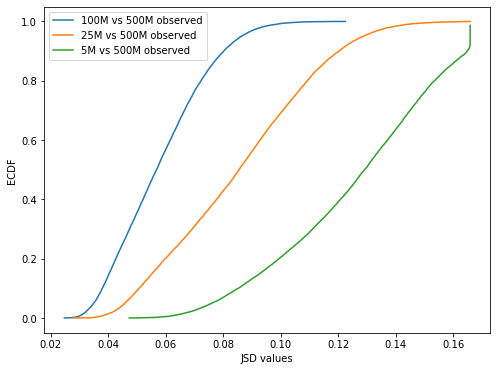

In [6]:
plt.figure(figsize=(8, 6))
ecdf = ECDF(jsd_100M_versus_500M_labels)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M observed")
ecdf = ECDF(jsd_25M_versus_500M_labels)
plt.plot(ecdf.x, ecdf.y,label="25M vs 500M observed")
ecdf = ECDF(jsd_5M_versus_500M_labels)
plt.plot(ecdf.x, ecdf.y,label="5M vs 500M observed")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()




In [7]:
# comparing observed jsd across subsampling expts

jsd_100M_versus_500M_preds = compare_arrays(pred_prof_100M, pred_prof_500M, smoothing=smoothing_flag)
jsd_25M_versus_500M_preds = compare_arrays(pred_prof_25M, pred_prof_500M,  smoothing=smoothing_flag)
jsd_5M_versus_500M_preds = compare_arrays(pred_prof_5M, pred_prof_500M,  smoothing=smoothing_flag)






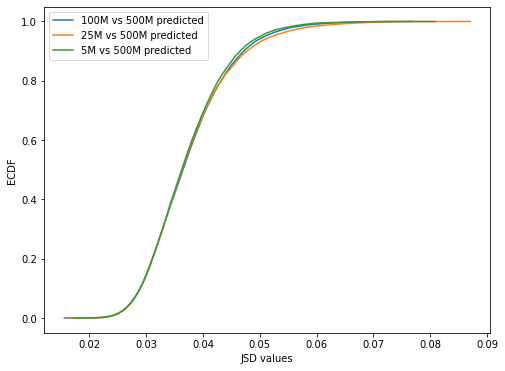

In [8]:
plt.figure(figsize=(8, 6))
ecdf = ECDF(jsd_100M_versus_500M_preds)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M predicted")
ecdf = ECDF(jsd_25M_versus_500M_preds)
plt.plot(ecdf.x, ecdf.y,label="25M vs 500M predicted")
ecdf = ECDF(jsd_5M_versus_500M_preds)
plt.plot(ecdf.x, ecdf.y,label="5M vs 500M predicted")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()



